#  Importing & Cleaning Data

In [121]:
import pandas as pd

df = pd.read_csv('/Users/christianholm/Desktop/cyberbullying_tweets.csv')

df.columns = df.columns.str.strip()
df

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]

In [122]:
df = df[df["cyberbullying_type"]!="other_cyberbullying"] # Remove "other_cyberbullying" - Scope

In [3]:
import pandas_profiling

pandas_profiling.ProfileReport(df).to_file('profileReport2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
chat_expressions = pd.read_csv('chat_expressions.csv', sep=',') # Reads Chat file for expressions eg LOL
                                                                # for cleaning
chat_expressions
chat_expressions_dict = dict(zip(chat_expressions.Chat_Words, chat_expressions.Chat_Words_Extended))

In [5]:
import re
def chat_words_to_norm_words_func(text): # Replace Twitter Lingo with the real words
    return re.sub(r'\S+', lambda m: chat_expressions_dict.get(m.group().upper(), m.group()) , text)

In [6]:
df['tweet_text'] = df['tweet_text'].apply(chat_words_to_norm_words_func)

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/517778295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text'] = df['tweet_text'].apply(chat_words_to_norm_words_func)


0      \
tweet_text          In other words #katandandre, your food was cra...   
cyberbullying_type                                  not_cyberbullying   

                                                                1      \
tweet_text          Why is #aussietv so white? #MKR #theblock #ImA...   
cyberbullying_type                                  not_cyberbullying   

                                                                2      \
tweet_text          @XochitlSuckkks a classy whore? Or more red ve...   
cyberbullying_type                                  not_cyberbullying   

                                                                3      \
tweet_text          @Jason_Gio meh. :P  thanks for the heads up, b...   
cyberbullying_type                                  not_cyberbullying   

                                                                4      \
tweet_text          @RudhoeEnglish This is an ISIS account pretend...   
cyberbullying_type                                  not_cyberbullying   

                                                                5      \
tweet_text          @Raja5aab @Quickieleaks Yes, the test of god i...   
cyberbullying_type                                  not_cyberbullying   

                                                                6      \
tweet_text          Itu sekolah ya bukan tempat bully! Ga jauh kay...   
cyberbullying_type                                  not_cyberbullying   

                                                                7      \
tweet_text          Karma. I hope it bites Kat on the butt. She is...   
cyberbullying_type                                  not_cyberbullying   

                                                           8      \
tweet_text          @stockputout everything but mostly my priest   
cyberbullying_type                             not_cyberbullying   

                                                                9      ...  \
tweet_text          Rebecca Black Drops Out of School Due to Bully...  ...   
cyberbullying_type                                  not_cyberbullying  ...   

                                                                47682  \
tweet_text          But... he’s right. Atlanta is full of so calle...   
cyberbullying_type                                          ethnicity   

                                                                47683  \
tweet_text          Black is a color . African American is a Cultu...   
cyberbullying_type                                          ethnicity   

                                                                47684  \
tweet_text          After black soldiers fought in WWI, many of th...   
cyberbullying_type                                          ethnicity   

                                                                47685  \
tweet_text          @KeithBishop64 Very true. It was a nice show t...   
cyberbullying_type                                          ethnicity   

                                                                47686  \
tweet_text          @YourFavWhiteGuy shut the fuck upAbout your du...   
cyberbullying_type                                          ethnicity   

                                                                47687  \
tweet_text          Black ppl aren't expected to do anything, depe...   
cyberbullying_type                                          ethnicity   

                                                                47688  \
tweet_text          Turner did not withhold his disappointment. Tu...   
cyberbullying_type                                          ethnicity   

                                                                47689  \
tweet_text          I swear to God. This dumb nigger bitch. I have...   
cyberbullying_type                                          ethnicity   

                                                                47690  \
tweet_text          Yea fuck yo

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import demoji
import string

In [124]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
stemmer = SnowballStemmer('english')
def clean_text(text):
    
    # Remove Hashtag, Mention, URLs DONE 
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    # Make all text lowercase DONE
    text = text.lower()
    
    # Stemming DONE
    text = " ".join([stemmer.stem(word) for word in text.split()])
    
    # Removing Punctuations DONE
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)
    
    # Removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    # Taking care of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [125]:
df['cleaned_text'] = df['tweet_text'].apply(lambda text: clean_text(text))  # Applying the cleaning to the text data

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/3897428344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['tweet_text'].apply(lambda text: clean_text(text))  # Applying the cleaning to the text data


In [7]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\|', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [8]:
clean_data = pd.DataFrame(df.tweet_text.apply(round1))
df['tweet_text'] = clean_data['tweet_text']

clean_data = pd.DataFrame(df.tweet_text.apply(round2))
df['tweet_text'] = clean_data['tweet_text']

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/279613784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text'] = clean_data['tweet_text']
/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/279613784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text'] = clean_data['tweet_text']


In [9]:
df

tweet_text cyberbullying_type
0      in other words katandandre your food was crapi...  not_cyberbullying
1      why is aussietv so white mkr theblock imaceleb...  not_cyberbullying
2      xochitlsuckkks a classy whore or more red velv...  not_cyberbullying
3      jasongio meh p  thanks for the heads up but no...  not_cyberbullying
4      rudhoeenglish this is an isis account pretendi...  not_cyberbullying
...                                                  ...                ...
47687  black ppl arent expected to do anything depend...          ethnicity
47688  turner did not withhold his disappointment tur...          ethnicity
47689  i swear to god this dumb nigger bitch i have g...          ethnicity
47690  yea fuck you rt therealexel if youre a nigger ...          ethnicity
47691  bro you gotta chill rt chillshrammy dog fuck k...          ethnicity

[39869 rows x 2 columns]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.tweet_text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aaa  aaaa  aaaaa  aaaaaaaaaa  aaaaaaaaaaaaaaaaaaaaaah  aaaaaaaaaah  \
0       0    0     0      0           0                        0            0   
1       0    0     0      0           0                        0            0   
2       0    0     0      0           0                        0            0   
3       0    0     0      0           0                        0            0   
4       0    0     0      0           0                        0            0   
...    ..  ...   ...    ...         ...                      ...          ...   
47687   0    0     0      0           0                        0            0   
47688   0    0     0      0           0                        0            0   
47689   0    0     0      0           0                        0            0   
47690   0    0     0      0           0                        0            0   
47691   0    0     0      0           0                        0            0   

       aaaaaaaaaajajajajajajajahahahajahaja  aaaaaaaahhhhhhh  aaaaah  ...  \
0                                         0                0       0  ...   
1                                         0                0       0  ...   
2                                         0                0       0  ...   
3                                         0                0       0  ...   
4                                         0                0       0  ...   
...                                     ...              ...     ...  ...   
47687                                     0                0       0  ...   
47688                                     0                0       0  ...   
47689                                     0                0       0  ...   
47690                                     0                0       0  ...   
47691                                     0                0       0  ...   

       𝕙𝕒𝕣𝕣𝕚𝕤𝕠𝕟  𝕠𝕘  𝕢𝕦𝕖𝕤𝕥𝕚𝕠𝕟  𝕣𝕠𝕟𝕟𝕚𝕖  𝕤𝕠𝕦𝕣𝕔𝕖  𝕥𝕙𝕖  𝕧𝕖𝕣𝕠𝕟𝕚𝕔𝕒  𝕨𝕠𝕦𝕝𝕕  𝕫𝕠𝕖𝕪  \
0             0   0         0       0       0    0         0      0     0   
1             0   0         0       0       0    0         0      0     0   
2             0   0         0       0       0    0         0      0     0   
3             0   0         0       0       0    0         0      0     0   
4             0   0         0       0       0    0         0      0     0   
...         ...  ..       ...     ...     ...  ...       ...    ...   ...   
47687         0   0         0       0       0    0         0      0     0   
47688         0   0         0       0       0    0         0      0     0   
47689         0   0         0       0       0    0         0      0     0   
47690         0   0         0       0       0    0         0      0     0   
47691         0   0         0       0       0    0         0      0     0   

       𝚎𝚕𝚞𝚜𝚒𝚟𝚎  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
47687        0  
47688        0  
47689        0  
47690        0  
47691        0  

[39869 rows x 53390 columns]

# Exploring Data

In [11]:
'''data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()'''

"data = pd.read_pickle('dtm.pkl')\ndata = data.transpose()\ndata.head()"

In [12]:
'''subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.tweet_text.values'''

"subset1 = df[df['cyberbullying_type']=='gender']\ntext_gender = subset1.tweet_text.values"

In [13]:
'''def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)'''

'def get_top_n_words(corpus, n=None):\n    """\n    List the top n words in a vocabulary according to occurrence in a text corpus.\n    """\n    vec = CountVectorizer().fit(corpus)\n    bag_of_words = vec.transform(corpus)\n    sum_words = bag_of_words.sum(axis=0) \n    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]\n    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)'

# Michaels Guide

In [14]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christianholm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christianholm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christianholm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/christianholm/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/christianholm/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/christianholm/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
def remove_english_stopwords_func(text):
    '''
    Removes Stop Words (also capitalized) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without Stop Words
    ''' 
    # check in lowercase 
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)    
    return text

In [16]:
def word_count_func(text):
    '''
    Counts words within a string
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Number of words within a string, integer
    ''' 
    return len(text.split())

In [17]:
df['tweet_text_tokenized'] = df['tweet_text'].apply(word_tokenize)

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/1542062491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text_tokenized'] = df['tweet_text'].apply(word_tokenize)


In [18]:
df['Token_Count'] = df['tweet_text_tokenized'].str.len()

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/3524322215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Token_Count'] = df['tweet_text_tokenized'].str.len()


In [19]:
df['Word_Count'] = df['tweet_text'].apply(word_count_func)

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/2771935709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word_Count'] = df['tweet_text'].apply(word_count_func)


In [20]:
df

tweet_text cyberbullying_type  \
0      in other words katandandre your food was crapi...  not_cyberbullying   
1      why is aussietv so white mkr theblock imaceleb...  not_cyberbullying   
2      xochitlsuckkks a classy whore or more red velv...  not_cyberbullying   
3      jasongio meh p  thanks for the heads up but no...  not_cyberbullying   
4      rudhoeenglish this is an isis account pretendi...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl arent expected to do anything depend...          ethnicity   
47688  turner did not withhold his disappointment tur...          ethnicity   
47689  i swear to god this dumb nigger bitch i have g...          ethnicity   
47690  yea fuck you rt therealexel if youre a nigger ...          ethnicity   
47691  bro you gotta chill rt chillshrammy dog fuck k...          ethnicity   

                                    tweet_text_tokenized  Token_Count  \
0      [in, other, words, katandandre, your, food, wa...            9   
1      [why, is, aussietv, so, white, mkr, theblock, ...           13   
2      [xochitlsuckkks, a, classy, whore, or, more, r...            9   
3      [jasongio, meh, p, thanks, for, the, heads, up...           18   
4      [rudhoeenglish, this, is, an, isis, account, p...           18   
...                                                  ...          ...   
47687  [black, ppl, arent, expected, to, do, anything...           42   
47688  [turner, did, not, withhold, his, disappointme...           45   
47689  [i, swear, to, god, this, dumb, nigger, bitch,...           20   
47690  [yea, fuck, you, rt, therealexel, if, youre, a...           15   
47691  [bro, you, got, ta, chill, rt, chillshrammy, d...           18   

       Word_Count  
0               9  
1              13  
2               9  
3              18  
4              18  
...           ...  
47687          42  
47688          45  
47689          20  
47690          15  
47691          17  

[39869 rows x 5 columns]

In [21]:
df['tweet_no_Stop_Words'] = df['tweet_text_tokenized'].apply(remove_english_stopwords_func)

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/1921802478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_no_Stop_Words'] = df['tweet_text_tokenized'].apply(remove_english_stopwords_func)


In [22]:
df['tweet_stop_word_count'] = df['tweet_no_Stop_Words'].apply(word_count_func)

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/2204842329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_stop_word_count'] = df['tweet_no_Stop_Words'].apply(word_count_func)


In [23]:
df

tweet_text cyberbullying_type  \
0      in other words katandandre your food was crapi...  not_cyberbullying   
1      why is aussietv so white mkr theblock imaceleb...  not_cyberbullying   
2      xochitlsuckkks a classy whore or more red velv...  not_cyberbullying   
3      jasongio meh p  thanks for the heads up but no...  not_cyberbullying   
4      rudhoeenglish this is an isis account pretendi...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl arent expected to do anything depend...          ethnicity   
47688  turner did not withhold his disappointment tur...          ethnicity   
47689  i swear to god this dumb nigger bitch i have g...          ethnicity   
47690  yea fuck you rt therealexel if youre a nigger ...          ethnicity   
47691  bro you gotta chill rt chillshrammy dog fuck k...          ethnicity   

                                    tweet_text_tokenized  Token_Count  \
0      [in, other, words, katandandre, your, food, wa...            9   
1      [why, is, aussietv, so, white, mkr, theblock, ...           13   
2      [xochitlsuckkks, a, classy, whore, or, more, r...            9   
3      [jasongio, meh, p, thanks, for, the, heads, up...           18   
4      [rudhoeenglish, this, is, an, isis, account, p...           18   
...                                                  ...          ...   
47687  [black, ppl, arent, expected, to, do, anything...           42   
47688  [turner, did, not, withhold, his, disappointme...           45   
47689  [i, swear, to, god, this, dumb, nigger, bitch,...           20   
47690  [yea, fuck, you, rt, therealexel, if, youre, a...           15   
47691  [bro, you, got, ta, chill, rt, chillshrammy, d...           18   

       Word_Count                                tweet_no_Stop_Words  \
0               9            words katandandre food crapilicious mkr   
1              13  aussietv white mkr theblock imacelebrityau tod...   
2               9    xochitlsuckkks classy whore red velvet cupcakes   
3              18  jasongio meh p thanks heads concerned another ...   
4              18  rudhoeenglish isis account pretending kurdish ...   
...           ...                                                ...   
47687          42  black ppl arent expected anything depended any...   
47688          45  turner withhold disappointment turner called c...   
47689          20  swear god dumb nigger bitch got bleach hair re...   
47690          15  yea fuck rt therealexel youre nigger fucking u...   
47691          17  bro got ta chill rt chillshrammy dog fuck kp d...   

       tweet_stop_word_count  
0                          5  
1                         10  
2                          6  
3                         10  
4                          9  
...                      ...  
47687                     22  
47688                     29  
47689                     13  
47690                     11  
47691                     14  

[39869 rows x 7 columns]

In [24]:
df.head().T

0  \
tweet_text             in other words katandandre your food was crapi...   
cyberbullying_type                                     not_cyberbullying   
tweet_text_tokenized   [in, other, words, katandandre, your, food, wa...   
Token_Count                                                            9   
Word_Count                                                             9   
tweet_no_Stop_Words              words katandandre food crapilicious mkr   
tweet_stop_word_count                                                  5   

                                                                       1  \
tweet_text             why is aussietv so white mkr theblock imaceleb...   
cyberbullying_type                                     not_cyberbullying   
tweet_text_tokenized   [why, is, aussietv, so, white, mkr, theblock, ...   
Token_Count                                                           13   
Word_Count                                                            13   
tweet_no_Stop_Words    aussietv white mkr theblock imacelebrityau tod...   
tweet_stop_word_count                                                 10   

                                                                       2  \
tweet_text             xochitlsuckkks a classy whore or more red velv...   
cyberbullying_type                                     not_cyberbullying   
tweet_text_tokenized   [xochitlsuckkks, a, classy, whore, or, more, r...   
Token_Count                                                            9   
Word_Count                                                             9   
tweet_no_Stop_Words      xochitlsuckkks classy whore red velvet cupcakes   
tweet_stop_word_count                                                  6   

                                                                       3  \
tweet_text             jasongio meh p  thanks for the heads up but no...   
cyberbullying_type                                     not_cyberbullying   
tweet_text_tokenized   [jasongio, meh, p, thanks, for, the, heads, up...   
Token_Count                                                           18   
Word_Count                                                            18   
tweet_no_Stop_Words    jasongio meh p thanks heads concerned another ...   
tweet_stop_word_count                                                 10   

                                                                       4  
tweet_text             rudhoeenglish this is an isis account pretendi...  
cyberbullying_type                                     not_cyberbullying  
tweet_text_tokenized   [rudhoeenglish, this, is, an, isis, account, p...  
Token_Count                                                           18  
Word_Count                                                            18  
tweet_no_Stop_Words    rudhoeenglish isis account pretending kurdish ...  
tweet_stop_word_count                                                  9

# Stemming, Normalizing, NER & POS

In [25]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [26]:
def norm_stemming_func(text):
    '''
    Stemming tokens from string using snowballstemmer aka porter2.
    Takes a word and transforms it into the original word Eg. Swam - Swim
    ''' 
    
    stemmer = SnowballStemmer('english')
    words = word_tokenize(text)
    text = " ".join([stemmer.stem(word) for word in words])
    return text

In [27]:
def norm_lemm_v_a_func(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens
    Step 3: Use word_tokenize() to get tokens from generated string        
    Step 4: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    return text2

In [28]:
df['tweets_lemmatized'] = df['tweet_no_Stop_Words'].apply(norm_lemm_v_a_func)

df['Word_Count_lemmatized_tweet'] = df['tweets_lemmatized'].apply(word_count_func)


/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/2248156921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweets_lemmatized'] = df['tweet_no_Stop_Words'].apply(norm_lemm_v_a_func)
/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/2248156921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word_Count_lemmatized_tweet'] = df['tweets_lemmatized'].apply(word_count_func)


In [29]:
df['tweet_stemming'] = df['tweet_no_Stop_Words'].apply(norm_stemming_func)

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/3185292888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_stemming'] = df['tweet_no_Stop_Words'].apply(norm_stemming_func)


In [30]:
df.head(7).T

0  \
tweet_text                   in other words katandandre your food was crapi...   
cyberbullying_type                                           not_cyberbullying   
tweet_text_tokenized         [in, other, words, katandandre, your, food, wa...   
Token_Count                                                                  9   
Word_Count                                                                   9   
tweet_no_Stop_Words                    words katandandre food crapilicious mkr   
tweet_stop_word_count                                                        5   
tweets_lemmatized                       word katandandre food crapilicious mkr   
Word_Count_lemmatized_tweet                                                  5   
tweet_stemming                              word katandandr food crapilici mkr   

                                                                             1  \
tweet_text                   why is aussietv so white mkr theblock imaceleb...   
cyberbullying_type                                           not_cyberbullying   
tweet_text_tokenized         [why, is, aussietv, so, white, mkr, theblock, ...   
Token_Count                                                                 13   
Word_Count                                                                  13   
tweet_no_Stop_Words          aussietv white mkr theblock imacelebrityau tod...   
tweet_stop_word_count                                                       10   
tweets_lemmatized            aussietv white mkr theblock imacelebrityau tod...   
Word_Count_lemmatized_tweet                                                 10   
tweet_stemming               aussietv white mkr theblock imacelebrityau tod...   

                                                                             2  \
tweet_text                   xochitlsuckkks a classy whore or more red velv...   
cyberbullying_type                                           not_cyberbullying   
tweet_text_tokenized         [xochitlsuckkks, a, classy, whore, or, more, r...   
Token_Count                                                                  9   
Word_Count                                                                   9   
tweet_no_Stop_Words            xochitlsuckkks classy whore red velvet cupcakes   
tweet_stop_word_count                                                        6   
tweets_lemmatized              xochitlsuckkks classy whore red velvet cupcakes   
Word_Count_lemmatized_tweet                                                  6   
tweet_stemming                    xochitlsuckkk classi whore red velvet cupcak   

                                                                             3  \
tweet_text                   jasongio meh p  thanks for the heads up but no...   
cyberbullying_type                                           not_cyberbullying   
tweet_text_tokenized         [jasongio, meh, p, thanks, for, the, heads, up...   
Token_Count                                                                 18   
Word_Count                                                                  18   
tweet_no_Stop_Words          jasongio meh p thanks heads concerned another ...   
tweet_stop_word_count                                                       10   
tweets_lemmatized            jasongio meh p thank head concern another angr...   
Word_Count_lemmatized_tweet                                                 10   
tweet_stemming               jasongio meh p thank head concern anoth angri ...   

                                                                             4  \
tweet_text                   rudhoeenglish this is an isis account pretendi...   
cyberbullying_type                                           not_cyberbullying   
tweet_text_tokenized         [rudhoeenglish, this, is, an, isis, account, p...   
Token_Count                                                                 18   
Word_Count                                             

## Single Char Removal

In [31]:
def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

### 1 Char 

In [32]:
df['tweets_cleaned_wo_single_char'] = df['tweets_lemmatized'].apply(remove_single_char_func)

df['Word_Count_cleaned_tweets_wo_single_char'] = df['tweets_cleaned_wo_single_char'].apply(word_count_func)

df.head(7).T

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/1183139842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweets_cleaned_wo_single_char'] = df['tweets_lemmatized'].apply(remove_single_char_func)
/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/1183139842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word_Count_cleaned_tweets_wo_single_char'] = df['tweets_cleaned_wo_single_char'].apply(word_count_func)


0  \
tweet_text                                in other words katandandre your food was crapi...   
cyberbullying_type                                                        not_cyberbullying   
tweet_text_tokenized                      [in, other, words, katandandre, your, food, wa...   
Token_Count                                                                               9   
Word_Count                                                                                9   
tweet_no_Stop_Words                                 words katandandre food crapilicious mkr   
tweet_stop_word_count                                                                     5   
tweets_lemmatized                                    word katandandre food crapilicious mkr   
Word_Count_lemmatized_tweet                                                               5   
tweet_stemming                                           word katandandr food crapilici mkr   
tweets_cleaned_wo_single_char                        word katandandre food crapilicious mkr   
Word_Count_cleaned_tweets_wo_single_char                                                  5   

                                                                                          1  \
tweet_text                                why is aussietv so white mkr theblock imaceleb...   
cyberbullying_type                                                        not_cyberbullying   
tweet_text_tokenized                      [why, is, aussietv, so, white, mkr, theblock, ...   
Token_Count                                                                              13   
Word_Count                                                                               13   
tweet_no_Stop_Words                       aussietv white mkr theblock imacelebrityau tod...   
tweet_stop_word_count                                                                    10   
tweets_lemmatized                         aussietv white mkr theblock imacelebrityau tod...   
Word_Count_lemmatized_tweet                                                              10   
tweet_stemming                            aussietv white mkr theblock imacelebrityau tod...   
tweets_cleaned_wo_single_char             aussietv white mkr theblock imacelebrityau tod...   
Word_Count_cleaned_tweets_wo_single_char                                                 10   

                                                                                          2  \
tweet_text                                xochitlsuckkks a classy whore or more red velv...   
cyberbullying_type                                                        not_cyberbullying   
tweet_text_tokenized                      [xochitlsuckkks, a, classy, whore, or, more, r...   
Token_Count                                                                               9   
Word_Count                                                                                9   
tweet_no_Stop_Words                         xochitlsuckkks classy whore red velvet cupcakes   
tweet_stop_word_count                                                                     6   
tweets_lemmatized                           xochitlsuckkks classy whore red velvet cupcakes   
Word_Count_lemmatized_tweet                                                               6   
tweet_stemming                                 xochitlsuckkk classi whore red velvet cupcak   
tweets_cleaned_wo_single_char               xochitlsuckkks classy whore red velvet cupcakes   
Word_Count_cleaned_tweets_wo_single_char                                                  6   

                                                                                          3  \
tweet_text                                jasongio meh p  thanks for the heads up but no...   
cyberbullying_type                                                        not_cyberbullying   
tweet_text_tokenized                      [jasongio, meh, p, thanks, for, the, heads, up...   
To

### 2 Char

In [33]:
df["tweets_cleaned_wo_char_length_2"] = df.apply(lambda x: remove_single_char_func(x["tweets_lemmatized"], 
                                                            threshold=2), axis = 1)

df['Word_Count_cleaned_tweets_wo_char_length_2'] = df['tweets_cleaned_wo_char_length_2'].apply(word_count_func)

df.head(10).T

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/3050672703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweets_cleaned_wo_char_length_2"] = df.apply(lambda x: remove_single_char_func(x["tweets_lemmatized"],
/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/3050672703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word_Count_cleaned_tweets_wo_char_length_2'] = df['tweets_cleaned_wo_char_length_2'].apply(word_count_func)


0  \
tweet_text                                  in other words katandandre your food was crapi...   
cyberbullying_type                                                          not_cyberbullying   
tweet_text_tokenized                        [in, other, words, katandandre, your, food, wa...   
Token_Count                                                                                 9   
Word_Count                                                                                  9   
tweet_no_Stop_Words                                   words katandandre food crapilicious mkr   
tweet_stop_word_count                                                                       5   
tweets_lemmatized                                      word katandandre food crapilicious mkr   
Word_Count_lemmatized_tweet                                                                 5   
tweet_stemming                                             word katandandr food crapilici mkr   
tweets_cleaned_wo_single_char                          word katandandre food crapilicious mkr   
Word_Count_cleaned_tweets_wo_single_char                                                    5   
tweets_cleaned_wo_char_length_2                        word katandandre food crapilicious mkr   
Word_Count_cleaned_tweets_wo_char_length_2                                                  5   

                                                                                            1  \
tweet_text                                  why is aussietv so white mkr theblock imaceleb...   
cyberbullying_type                                                          not_cyberbullying   
tweet_text_tokenized                        [why, is, aussietv, so, white, mkr, theblock, ...   
Token_Count                                                                                13   
Word_Count                                                                                 13   
tweet_no_Stop_Words                         aussietv white mkr theblock imacelebrityau tod...   
tweet_stop_word_count                                                                      10   
tweets_lemmatized                           aussietv white mkr theblock imacelebrityau tod...   
Word_Count_lemmatized_tweet                                                                10   
tweet_stemming                              aussietv white mkr theblock imacelebrityau tod...   
tweets_cleaned_wo_single_char               aussietv white mkr theblock imacelebrityau tod...   
Word_Count_cleaned_tweets_wo_single_char                                                   10   
tweets_cleaned_wo_char_length_2             aussietv white mkr theblock imacelebrityau tod...   
Word_Count_cleaned_tweets_wo_char_length_2                                                 10   

                                                                                            2  \
tweet_text                                  xochitlsuckkks a classy whore or more red velv...   
cyberbullying_type                                                          not_cyberbullying   
tweet_text_tokenized                        [xochitlsuckkks, a, classy, whore, or, more, r...   
Token_Count                                                                                 9   
Word_Count                                                                                  9   
tweet_no_Stop_Words                           xochitlsuckkks classy whore red velvet cupcakes   
tweet_stop_word_count                                                                       6   
tweets_lemmatized                             xochitlsuckkks classy whore red velvet cupcakes   
Word_Count_lemmatized_tweet                                                                 6   
tweet_stemming                                   xochitlsuckkk classi whore red velvet cupcak   
tweets_cleaned_wo_single_char                 xochitlsuckkks classy whore red velvet cupcakes   
Word_Count_clean

## Text-Exploration Most Used Words & Least Used Words

In [34]:
def token_and_unique_word_count_func(text):
    '''
    Outputs the number of words and unique words
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to count unique words
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Prints:
        Number of existing tokens and number of unique words
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    print('Number of tokens: ' + str(len(words))) 
    print('Number of unique words: ' + str(len(fdist)))

In [35]:
def most_common_word_func(text, n_words=25):
    '''
    Returns a DataFrame with the most commonly used words from a text with their frequencies
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        A DataFrame with the most commonly occurring words (by default = 25) with their frequencies
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).head(n_words)
    
    return df_fdist

In [36]:
def least_common_word_func(text, n_words=25):
    '''
    Returns a DataFrame with the least commonly used words from a text with their frequencies
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        A DataFrame with the least commonly occurring words (by default = 25) with their frequencies
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).tail(n_words)
    
    return df_fdist

In [37]:
text_corpus = df['tweets_cleaned_wo_single_char'].str.cat(sep=' ')

text_corpus

'word katandandre food crapilicious mkr aussietv white mkr theblock imacelebrityau today sunrise neighbour wonderlandten etc xochitlsuckkks classy whore red velvet cupcakes jasongio meh thank head concern another angry dude twitter rudhoeenglish isis account pretend kurdish account like islam lie quickieleaks yes test god good bad indifferent weird whatever prove gods existence itu sekolah ya bukan tempat bully ga jauh kaya neraka karma hope bite kat butt nasty mkr stockputout everything mostly priest rebecca black drop school due bully jordisdead bully flush kd ughhhh mkr rt kurdsnews turkish state kill children last years news googleçeviricitopluluğukürtçeyidee love best response hotcakes manage film noncommittal meh adolescent mkr yasmimcaci bferrarii parem de fazer bully comigo uhahuah bando de preto sarinhacoral victormaggi tadinhu de mim sofrendo bull viu mimi twitter basically angry letter generation best pick line hi youre cute love people call jam potter bully mypatronusisyou 

In [38]:
token_and_unique_word_count_func(text_corpus)


Number of tokens: 579819
Number of unique words: 48719


In [39]:
df_most_common_words_text_corpus = most_common_word_func(text_corpus)

df_most_common_words_text_corpus.head(10)

Word  Frequency
54      bully      10281
72     school       9129
271      fuck       7492
34       like       5757
2521     joke       5532
1863     dumb       5335
1407     high       5143
126       get       5003
121    people       4473
33733  nigger       4322

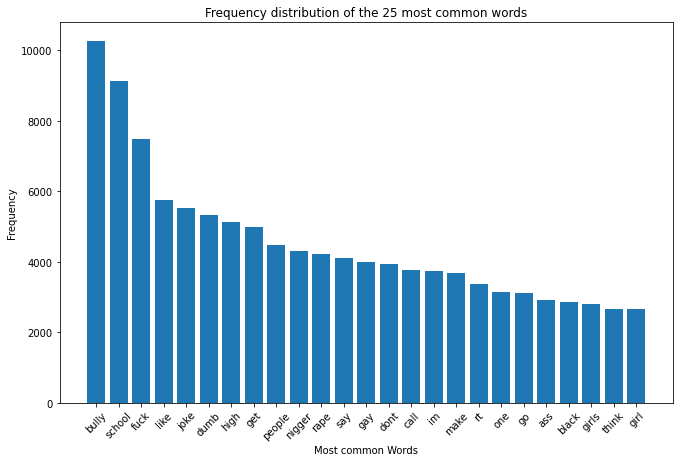

In [40]:
plt.figure(figsize=(11,7))
plt.bar(df_most_common_words_text_corpus['Word'], 
        df_most_common_words_text_corpus['Frequency'])

plt.xticks(rotation = 45)

plt.xlabel('Most common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 25 most common words")

plt.show()

### Word Removal

In [41]:
def single_word_remove_func(text, word_2_remove):
    '''
    Removes a specific word from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes the defined word from the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
        word_2_remove (str): Word to be removed from the text, string
    
    Returns:
        String with removed words
    '''    
    word_to_remove = word_2_remove
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word != word_to_remove])
    return text

In [42]:
df["tweets_cleaned_wo_specific_word"] = df.apply(lambda x: single_word_remove_func(x["tweets_cleaned_wo_single_char"], "muslims।।"), axis = 1)

/var/folders/dx/952lcbzx783fr94q_pddfgv80000gn/T/ipykernel_59735/1526541330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweets_cleaned_wo_specific_word"] = df.apply(lambda x: single_word_remove_func(x["tweets_cleaned_wo_single_char"], "muslims।।"), axis = 1)


In [43]:
text_corpus = df['tweets_cleaned_wo_specific_word'].str.cat(sep=' ')

text_corpus

'word katandandre food crapilicious mkr aussietv white mkr theblock imacelebrityau today sunrise neighbour wonderlandten etc xochitlsuckkks classy whore red velvet cupcakes jasongio meh thank head concern another angry dude twitter rudhoeenglish isis account pretend kurdish account like islam lie quickieleaks yes test god good bad indifferent weird whatever prove gods existence itu sekolah ya bukan tempat bully ga jauh kaya neraka karma hope bite kat butt nasty mkr stockputout everything mostly priest rebecca black drop school due bully jordisdead bully flush kd ughhhh mkr rt kurdsnews turkish state kill children last years news googleçeviricitopluluğukürtçeyidee love best response hotcakes manage film noncommittal meh adolescent mkr yasmimcaci bferrarii parem de fazer bully comigo uhahuah bando de preto sarinhacoral victormaggi tadinhu de mim sofrendo bull viu mimi twitter basically angry letter generation best pick line hi youre cute love people call jam potter bully mypatronusisyou 

In [44]:
df_least_common_words_text_corpus = least_common_word_func(text_corpus, n_words=10)

df_least_common_words_text_corpus

Word  Frequency
22837                       archibaldcrane          1
22836                             deancarr          1
22834                          bieberroast          1
22833                            womenyoud          1
22832                                 elam          1
22831                         thereginamom          1
22830                           bunkerbaby          1
22828  httpswwwyoutubecomwatchvbngacqnkwdq          1
22827                           warningear          1
48717                         chillshrammy          1

In [45]:
text_corpus_original = df['tweets_cleaned_wo_single_char'].str.cat(sep=' ')
text_corpus_wo_specific_word = df['tweets_cleaned_wo_specific_word'].str.cat(sep=' ')

print('Number of words (before single word removal): ' + str(word_count_func(text_corpus_original)))
print('Number of words (after single word removal): ' + str(word_count_func(text_corpus_wo_specific_word)))
print()
print('Diff: ' + str(word_count_func(text_corpus_original) - word_count_func(text_corpus_wo_specific_word)))

Number of words (before single word removal): 579819
Number of words (after single word removal): 579818

Diff: 1


In [46]:
df_count = df['cyberbullying_type'].value_counts()

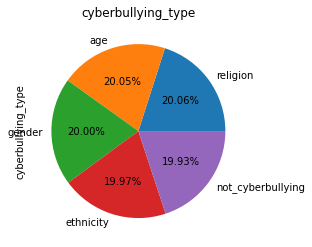

In [47]:
df_count.plot.pie(autopct = '%.2f%%', title = 'cyberbullying_type')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39869 entries, 0 to 47691
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   tweet_text                                  39869 non-null  object
 1   cyberbullying_type                          39869 non-null  object
 2   tweet_text_tokenized                        39869 non-null  object
 3   Token_Count                                 39869 non-null  int64 
 4   Word_Count                                  39869 non-null  int64 
 5   tweet_no_Stop_Words                         39869 non-null  object
 6   tweet_stop_word_count                       39869 non-null  int64 
 7   tweets_lemmatized                           39869 non-null  object
 8   Word_Count_lemmatized_tweet                 39869 non-null  int64 
 9   tweet_stemming                              39869 non-null  object
 10  tweets_cleaned_wo_sing

In [49]:
final_df = pd.DataFrame()
final_df['tweets_cleaned'] = df['tweets_cleaned_wo_specific_word']
final_df['cyberbullying_type'] = df['cyberbullying_type']

In [50]:
final_df

tweets_cleaned cyberbullying_type
0                 word katandandre food crapilicious mkr  not_cyberbullying
1      aussietv white mkr theblock imacelebrityau tod...  not_cyberbullying
2        xochitlsuckkks classy whore red velvet cupcakes  not_cyberbullying
3      jasongio meh thank head concern another angry ...  not_cyberbullying
4      rudhoeenglish isis account pretend kurdish acc...  not_cyberbullying
...                                                  ...                ...
47687  black ppl arent expect anything depend anythin...          ethnicity
47688  turner withhold disappointment turner call cou...          ethnicity
47689  swear god dumb nigger bitch get bleach hair re...          ethnicity
47690  yea fuck rt therealexel youre nigger fuck unfo...          ethnicity
47691  bro get ta chill rt chillshrammy dog fuck kp d...          ethnicity

[39869 rows x 2 columns]

# Classification / Modeling
Now our text has been cleaned and we have discovered it to found our data is balanced</br>
From now we are going to split our data up into train, predict, test.</br>
Afterwards we are going to find the best classifier for our data</br>
Lastly we are going to build a pipeline and predict if incoming tweets are cyberbullying or not

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [127]:
#X = final_df['tweets_cleaned'] # The Tweets
#y = final_df['cyberbullying_type'] # The Label
X = df['cleaned_text'] # The Tweets
y = df['cyberbullying_type'] # The Label

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
# Performing the train|test split. This test set is essentially a hold out test set as we'll be performing Cross Validation
# using Grid Search which will split our training data into a training and validation split

In [129]:
tfidf = TfidfVectorizer(max_features = 5000)  # Using the TF - IDF Vectorizer to extract top 5000 most important features
# from the text data 

In [130]:
# Feature Extraction
X_train_tfidf = tfidf.fit_transform(X_train)  # Creating the vocabulary only from the training set to avoid data leakage from 
X_test_tfidf = tfidf.transform(X_test)        # the test set.

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_array_train = X_train_tfidf.toarray()   # Converting the sparse matrix to a numpy array (dense matrix)
tfidf_array_test = X_test_tfidf.toarray()     # Converting the sparse matrix to a numpy array (dense matrix)
scaled_X_train = scaler.fit_transform(tfidf_array_train)  # Fitting on only training data to avoid data leakage from test data
scaled_X_test = scaler.transform(tfidf_array_test) # and then tranforming both training and testing data

In [132]:
# From 3d to 2d?
from sklearn.decomposition import PCA
NUM_COMPONENTS = 5000  # Total number of features
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit(scaled_X_train)
# Performing Dimensionality Reduction using Principal Component Analysis

In [133]:
import numpy as np
variance_explained = np.cumsum(pca.explained_variance_ratio_)  # Calculating the cumulative explained variance by the components

Text(0, 0.5, 'Cumulative explained variance')

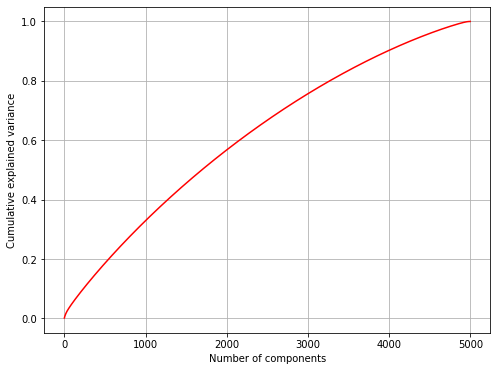

In [134]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [135]:
final_pca = PCA(0.9)   
reduced_90 = final_pca.fit_transform(scaled_X_train) # Number of Components explaining 90% variance in the training data

In [136]:
reduced_90_test = final_pca.transform(scaled_X_test)

In [137]:
reduced_90.shape

(35882, 3979)

In [138]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

#### Naive - Bayes

                   precision    recall  f1-score   support

              age       0.83      0.97      0.89       793
        ethnicity       0.90      0.93      0.92       839
           gender       0.85      0.83      0.84       749
not_cyberbullying       0.81      0.56      0.66       832
         religion       0.85      0.96      0.90       774

         accuracy                           0.85      3987
        macro avg       0.85      0.85      0.84      3987
     weighted avg       0.85      0.85      0.84      3987



/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


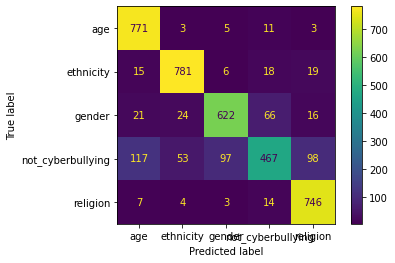

In [65]:
# NAIVE - BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
preds_nb_model = nb_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_nb_model))
plot_confusion_matrix(nb_model, X_test_tfidf, y_test)

### Random Forrest

                   precision    recall  f1-score   support

              age       0.99      0.98      0.98       793
        ethnicity       0.99      0.98      0.98       839
           gender       0.91      0.84      0.87       749
not_cyberbullying       0.80      0.88      0.84       832
         religion       0.96      0.95      0.95       774

         accuracy                           0.92      3987
        macro avg       0.93      0.92      0.92      3987
     weighted avg       0.93      0.92      0.92      3987



/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


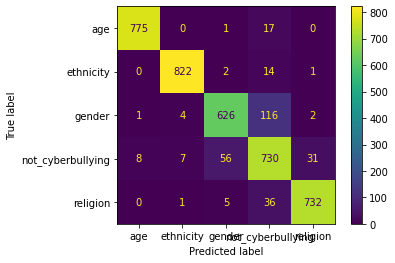

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
n_estimators = [64, 100, 128]
bootstrap = [True, False] # Bootstrapping is true by default
param_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap}
grid_rf_model = HalvingGridSearchCV(rf_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_rf_model.fit(X_train_tfidf, y_train)
preds_grid_rf_model = grid_rf_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_rf_model))
plot_confusion_matrix(grid_rf_model, X_test_tfidf, y_test)

                   precision    recall  f1-score   support

              age       0.95      0.98      0.97       793
        ethnicity       0.98      0.98      0.98       839
           gender       0.96      0.85      0.90       749
not_cyberbullying       0.82      0.88      0.85       832
         religion       0.96      0.95      0.96       774

         accuracy                           0.93      3987
        macro avg       0.93      0.93      0.93      3987
     weighted avg       0.93      0.93      0.93      3987



/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


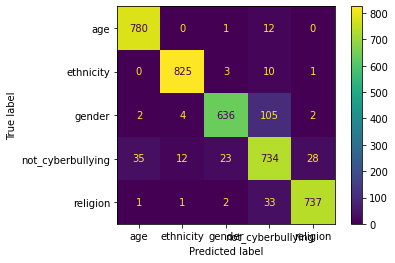

In [68]:
# SUPPORT VECTOR MACHINES
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_svm_model))
plot_confusion_matrix(grid_svm_model, X_test_tfidf, y_test)

/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iter

                   precision    recall  f1-score   support

              age       0.96      0.95      0.96       793
        ethnicity       0.97      0.98      0.98       839
           gender       0.92      0.86      0.89       749
not_cyberbullying       0.80      0.86      0.83       832
         religion       0.96      0.94      0.95       774

         accuracy                           0.92      3987
        macro avg       0.92      0.92      0.92      3987
     weighted avg       0.92      0.92      0.92      3987



/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


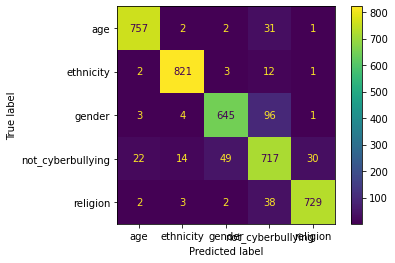

In [69]:
# NEURAL NETWORKS
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation = 'logistic', max_iter = 10)  # Sigmoid Activation Function
param_grid = {'learning_rate_init': [0.001, 0.0015, 0.002, 0.0025]}
grid_nn_model = HalvingGridSearchCV(nn_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_nn_model.fit(X_train_tfidf, y_train)
preds_grid_nn_model = grid_nn_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_nn_model))
plot_confusion_matrix(grid_nn_model, X_test_tfidf, y_test)

                   precision    recall  f1-score   support

              age       0.99      0.97      0.98       793
        ethnicity       1.00      0.98      0.99       839
           gender       0.95      0.84      0.89       749
not_cyberbullying       0.79      0.93      0.85       832
         religion       0.97      0.93      0.95       774

         accuracy                           0.93      3987
        macro avg       0.94      0.93      0.93      3987
     weighted avg       0.94      0.93      0.93      3987



/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


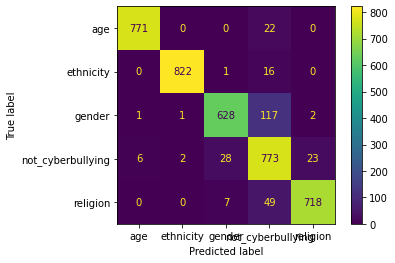

In [70]:
# GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier(random_state = 42)
param_grid = {'n_estimators': [64, 100, 128, 200]}
grid_grad_model = HalvingGridSearchCV(grad_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_grad_model.fit(X_train_tfidf, y_train)
preds_grid_grad_model = grid_grad_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_grad_model))
plot_confusion_matrix(grid_grad_model, X_test_tfidf, y_test)

/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   precision    recall  f1-score   support

              age       0.88      0.86      0.87       793
        ethnicity       0.92      0.92      0.92       839
           gender       0.78      0.79      0.78       749
not_cyberbullying       0.70      0.69      0.70       832
         religion       0.85      0.87      0.86       774

         accuracy                           0.82      3987
        macro avg       0.83      0.82      0.82      3987
     weighted avg       0.83      0.82      0.83      3987



/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


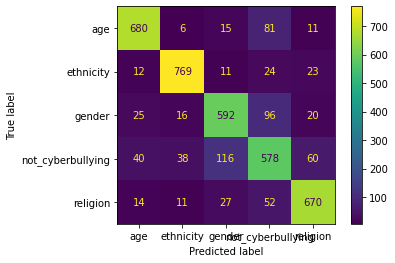

In [71]:
# LOGISTIC REGRESSION with the the 90% variance data
from sklearn.linear_model import LogisticRegression
log_model_pca = LogisticRegression()
log_model_pca.fit(reduced_90, y_train)
preds_log_model_pca = log_model_pca.predict(reduced_90_test)
print(classification_report(y_test, preds_log_model_pca))
plot_confusion_matrix(log_model_pca, reduced_90_test, y_test)

/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarni

                   precision    recall  f1-score   support

              age       0.96      0.97      0.96       793
        ethnicity       0.98      0.98      0.98       839
           gender       0.94      0.85      0.89       749
not_cyberbullying       0.81      0.89      0.84       832
         religion       0.96      0.95      0.95       774

         accuracy                           0.93      3987
        macro avg       0.93      0.93      0.93      3987
     weighted avg       0.93      0.93      0.93      3987



/Users/christianholm/Desktop/SoftwareDevelopment/AAI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


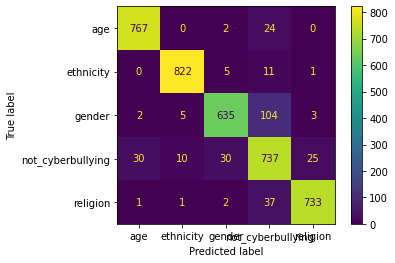

In [72]:
# LOGISTIC REGRESSION with the complete data
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(X_train_tfidf, y_train)
preds_grid_log_model = grid_log_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_log_model))
plot_confusion_matrix(grid_log_model, X_test_tfidf, y_test)

## Pipeline Creation

In [140]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000)), ('rf_model', RandomForestClassifier(n_estimators = 128, random_state = 42))])
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('rf_model',
                 RandomForestClassifier(n_estimators=128, random_state=42))])

In [141]:
pipe.predict(["Going to Africa. Hope I don't get AIDS. Just kidding. I'm white!"])

array(['ethnicity'], dtype=object)

In [1]:
roc_auc(DecisionTreeModel, scaled_X_train, y_train_pred, X_test = scaled_X_test, y_test = y_test,
               classes=['age', 'ethnicity', 'gender', 'not_cyberbullying', 'religion'])

NameError: name 'roc_auc' is not defined